# Data Analysis on Customer Credit Card prediction 

In [1]:
# Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Load Dataset 

In [2]:
# Load dataset 

'''
    Loading the dataset, using an error handling routine 
'''
try:
    dataset = pd.read_csv('Loan_default.csv')
except FileNotFoundError as e:
    print(f"File does not exist \n {e} \n Try again")

# Explore Dataset

## Dataset Info 

In [3]:
# Confirm dataset
dataset.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
dataset.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


# Transform Dataset 

## Check for Duplicates in the Dataset 

In [5]:
dataset.count()

LoanID            255347
Age               255347
Income            255347
LoanAmount        255347
CreditScore       255347
MonthsEmployed    255347
NumCreditLines    255347
InterestRate      255347
LoanTerm          255347
DTIRatio          255347
Education         255347
EmploymentType    255347
MaritalStatus     255347
HasMortgage       255347
HasDependents     255347
LoanPurpose       255347
HasCoSigner       255347
Default           255347
dtype: int64

<p> The Total number of datacount is 255,347 <p>

In [6]:
# Check for duplicates 
dataset.duplicated().value_counts()

False    255347
Name: count, dtype: int64

<p> Since the total number of dataset count = the total number of False Counts, it can be said that there are no duplicate data <p>

## Datasets with Categorical data 

In [7]:
# List of categorical columns
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 
                       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

In [8]:
# Print rows of these categorical columns
print("Rows with categorical data:")
print(dataset[categorical_columns])

Rows with categorical data:
          Education EmploymentType MaritalStatus HasMortgage HasDependents  \
0        Bachelor's      Full-time      Divorced         Yes           Yes   
1          Master's      Full-time       Married          No            No   
2          Master's     Unemployed      Divorced         Yes           Yes   
3       High School      Full-time       Married          No            No   
4        Bachelor's     Unemployed      Divorced          No           Yes   
...             ...            ...           ...         ...           ...   
255342   Bachelor's      Full-time       Married          No            No   
255343  High School      Part-time      Divorced          No            No   
255344  High School  Self-employed       Married         Yes           Yes   
255345  High School      Part-time        Single         Yes           Yes   
255346   Bachelor's     Unemployed      Divorced         Yes            No   

       LoanPurpose HasCoSigner  
0 

## Encode Categorical Data

## Import Library and Duplicate data

In [9]:

# Copy the DataFrame to avoid modifying the original one
df_encoded = dataset.copy()

In [10]:
from sklearn.preprocessing import LabelEncoder # For label encoding

In [11]:
# Initialize label encoder 
label_encoder = LabelEncoder()

## Encode Education

In [12]:
# Fit and transform the 'Education' column
df_encoded['Education'] = label_encoder.fit_transform(df_encoded['Education'])

# Display the first few rows of the new DataFrame
print(df_encoded['Education'])


0         0
1         2
2         2
3         1
4         0
         ..
255342    0
255343    1
255344    1
255345    1
255346    0
Name: Education, Length: 255347, dtype: int64


In [13]:
# Print mapping of labels to integers
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

Bachelor's: 0
High School: 1
Master's: 2
PhD: 3


## Encode EmploymentType

In [14]:
# Fit and transform the 'EmploymentType' column
df_encoded['EmploymentType'] = label_encoder.fit_transform(df_encoded['EmploymentType'])

# Display the first few rows of the new DataFrame
print(df_encoded.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4         15.23        36      0.44          0   
1               1          4.81        60      0.68          2   
2               3         21.17        24      0.31          2   
3               3          7.07        24      0.23          1   
4               4          6.51        48      0.73          0   

   EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0               0      Divorced         Yes           Yes       Other   
1               0       Marrie

In [15]:
# Print mapping of labels to integers
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

Full-time: 0
Part-time: 1
Self-employed: 2
Unemployed: 3


## Encode MaritalStatus

In [16]:
# Fit and transform the 'MaritalStatus' column
df_encoded['MaritalStatus'] = label_encoder.fit_transform(df_encoded['MaritalStatus'])

# Display the first few rows of the new DataFrame
print(df_encoded.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4         15.23        36      0.44          0   
1               1          4.81        60      0.68          2   
2               3         21.17        24      0.31          2   
3               3          7.07        24      0.23          1   
4               4          6.51        48      0.73          0   

   EmploymentType  MaritalStatus HasMortgage HasDependents LoanPurpose  \
0               0              0         Yes           Yes       Other   
1               0           

In [17]:
# Print mapping of labels to integers
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

Divorced: 0
Married: 1
Single: 2


## Enconde HasMortgage

In [18]:
# Fit and transform the 'HasMortgage' column
df_encoded['HasMortgage'] = label_encoder.fit_transform(df_encoded['HasMortgage'])

# Display the first few rows of the new DataFrame
print(df_encoded.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4         15.23        36      0.44          0   
1               1          4.81        60      0.68          2   
2               3         21.17        24      0.31          2   
3               3          7.07        24      0.23          1   
4               4          6.51        48      0.73          0   

   EmploymentType  MaritalStatus  HasMortgage HasDependents LoanPurpose  \
0               0              0            1           Yes       Other   
1               0         

In [19]:
# Print mapping of labels to integers
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

No: 0
Yes: 1


## Encode HasDependents

In [20]:
# Fit and transform the 'HasDependents' column
df_encoded['HasDependents'] = label_encoder.fit_transform(df_encoded['HasDependents'])

# Display the first few rows of the new DataFrame
print(df_encoded.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4         15.23        36      0.44          0   
1               1          4.81        60      0.68          2   
2               3         21.17        24      0.31          2   
3               3          7.07        24      0.23          1   
4               4          6.51        48      0.73          0   

   EmploymentType  MaritalStatus  HasMortgage  HasDependents LoanPurpose  \
0               0              0            1              1       Other   
1               0       

In [21]:
# Print mapping of labels to integers
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

No: 0
Yes: 1


## Encode LoanPurpose

In [22]:
# Fit and transform the 'LoanPurpose' column
df_encoded['LoanPurpose'] = label_encoder.fit_transform(df_encoded['LoanPurpose'])

# Display the first few rows of the new DataFrame
print(df_encoded.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4         15.23        36      0.44          0   
1               1          4.81        60      0.68          2   
2               3         21.17        24      0.31          2   
3               3          7.07        24      0.23          1   
4               4          6.51        48      0.73          0   

   EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  \
0               0              0            1              1            4   
1               0     

In [23]:
# Print mapping of labels to integers
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

Auto: 0
Business: 1
Education: 2
Home: 3
Other: 4


## Encode HasCoSigner

In [24]:
# Fit and transform the 'LoanPurpose' column
df_encoded['HasCoSigner'] = label_encoder.fit_transform(df_encoded['HasCoSigner'])

# Display the first few rows of the new DataFrame
print(df_encoded.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4         15.23        36      0.44          0   
1               1          4.81        60      0.68          2   
2               3         21.17        24      0.31          2   
3               3          7.07        24      0.23          1   
4               4          6.51        48      0.73          0   

   EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  \
0               0              0            1              1            4   
1               0     

## Check Details of encoded Dataset 

In [25]:
# Confirm dataset
df_encoded.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


In [26]:
df_encoded.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,1.494421,1.500096,0.999918,0.500014,0.500268,2.000501,0.500108,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,1.118826,1.117358,0.816051,0.500001,0.500001,1.412723,0.500001,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,3.000000,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


### Drop LoanID 

In [27]:
'''
    Dropping Loan ID because it does not have any predicitve index
    it is just a unique identifier
'''

# Drop the 'LoanID' column
df_reduced = df_encoded.drop('LoanID', axis=1)

In [28]:
# Display the updated DataFrame
df_reduced

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,0,1,0,0,4,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,1,0,0,0,3,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,2,1,1,1,0,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,1,2,1,1,4,0,0


## Check for highly correlated columns and drop 

### 1. Get corellation Matrix 

In [29]:
# Compute the correlation matrix
correlation_matrix = df_reduced.corr()

# Display the correlation matrix
print(correlation_matrix)

                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000 -0.001244   -0.002213    -0.000548       -0.000341   
Income         -0.001244  1.000000   -0.000865    -0.001430        0.002675   
LoanAmount     -0.002213 -0.000865    1.000000     0.001261        0.002817   
CreditScore    -0.000548 -0.001430    0.001261     1.000000        0.000613   
MonthsEmployed -0.000341  0.002675    0.002817     0.000613        1.000000   
NumCreditLines -0.000890 -0.002016    0.000794     0.000016        0.001267   
InterestRate   -0.001127 -0.002303   -0.002291     0.000436        0.000096   
LoanTerm        0.000263 -0.000998    0.002538     0.001130       -0.001166   
DTIRatio       -0.004689  0.000205    0.001122    -0.001039        0.001765   
Education      -0.000882 -0.000965    0.002551     0.000214       -0.001304   
EmploymentType  0.000787 -0.005146    0.003060     0.003503        0.000564   
MaritalStatus  -0.002187  0.000637   -0.000771    -0

### 2. Identify Highly Corellated Pairs

In [30]:
# Set the threshold for high correlation
threshold = 0.9

# Find pairs of columns with high correlation
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if np.abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname1, colname2, correlation_matrix.iloc[i, j]))


In [31]:
# Display highly correlated pairs
print("Highly correlated pairs:")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Highly correlated pairs:


<p> There are no highly correlated columns <p>

### 3. Check for Missing Values

In [32]:
import missingno as msno

In [33]:
# Check for missing values in each column
missing_values = df_reduced.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [34]:
# Check for missing values in each row
missing_values_rows = df_reduced.isnull().sum(axis=1)
print("\nMissing values in each row:")
print(missing_values_rows)


Missing values in each row:
0         0
1         0
2         0
3         0
4         0
         ..
255342    0
255343    0
255344    0
255345    0
255346    0
Length: 255347, dtype: int64


In [35]:
# Display DataFrame info
print("\nDataFrame info:")
df_reduced.info()


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  int64  
 10  EmploymentType  255347 non-null  int64  
 11  MaritalStatus   255347 non-null  int64  
 12  HasMortgage     255347 non-null  int64  
 13  HasDependents   255347 non-null  int64  
 14  LoanPurpose     255347 non-null  int64  
 15  HasCoSigner     255347 non-null  int64  
 16  Default         255347 non-null  int64 


Missing values visualization:


<Axes: >

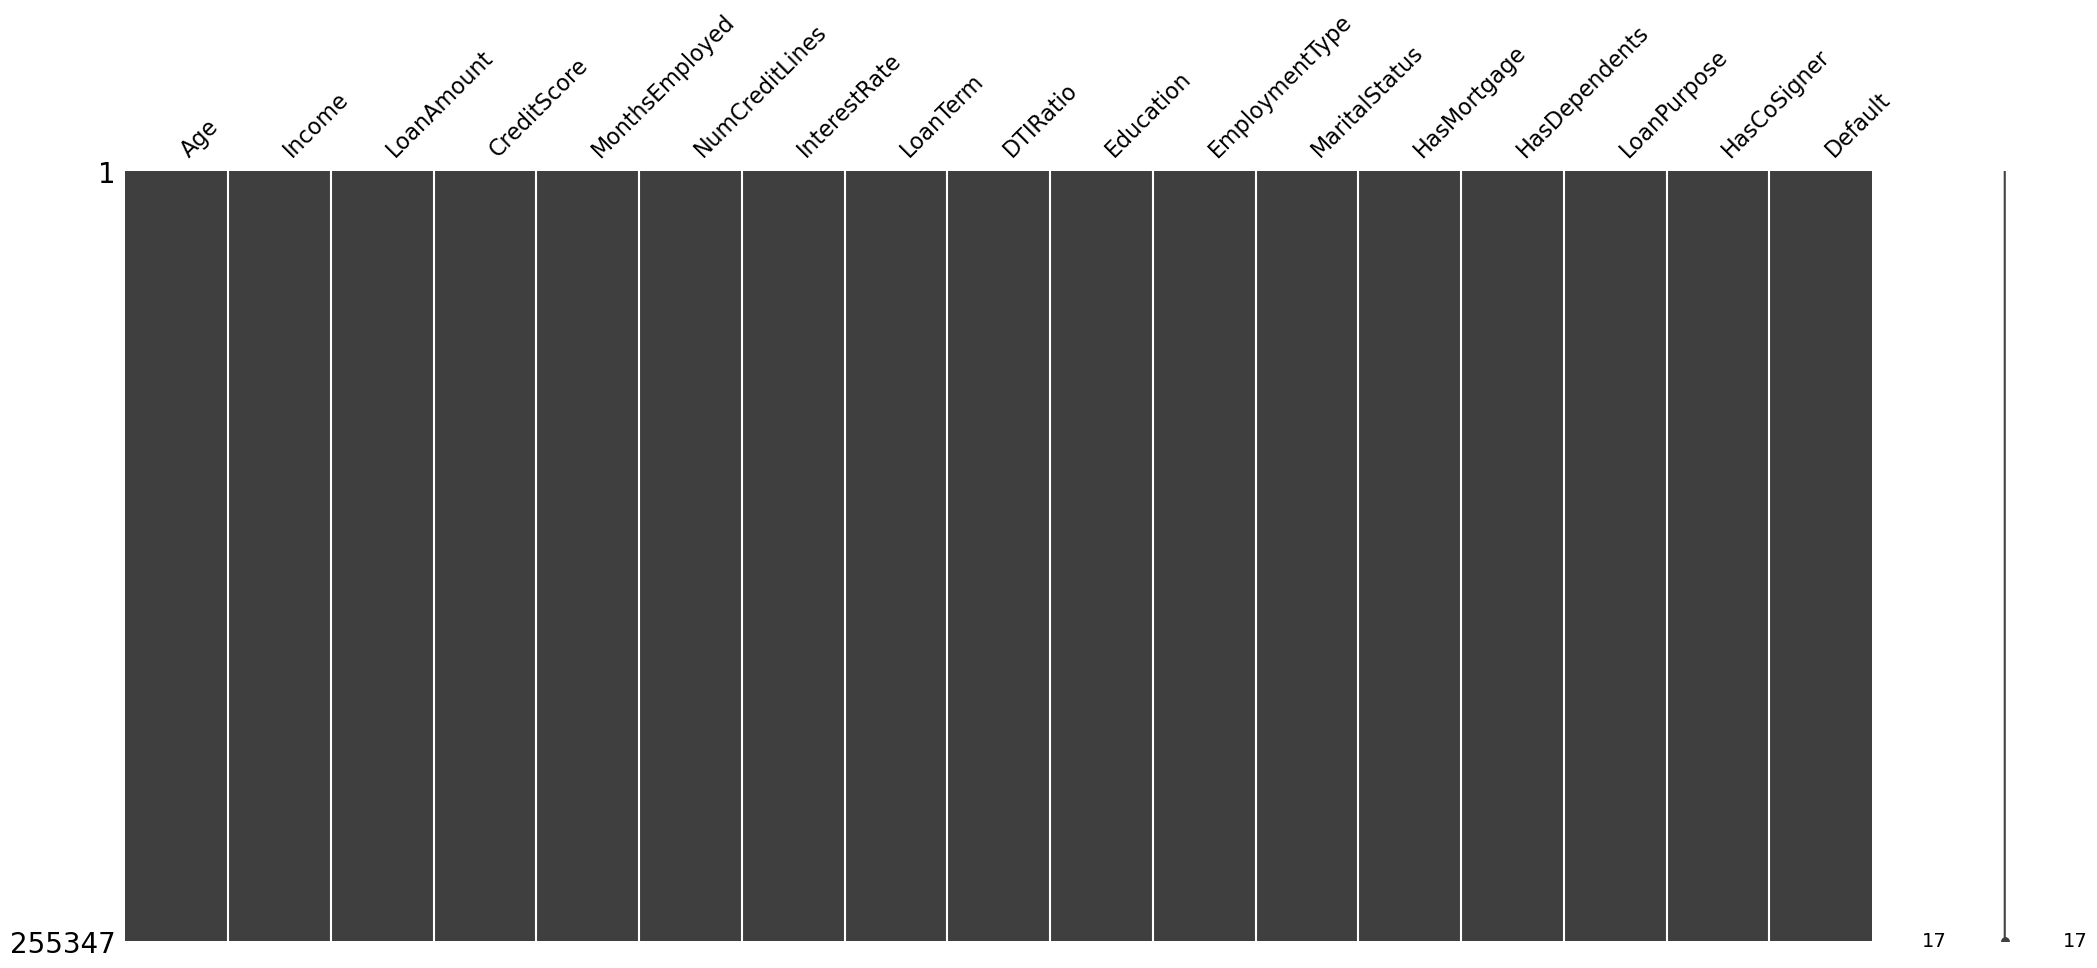

In [36]:
# Visualize missing values
print("\nMissing values visualization:")
msno.matrix(df_reduced)

# Exploratory Data Analysis on Dataframe (df_reduced)

In [37]:
import seaborn as sns

Descriptive statistics:
                 Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   

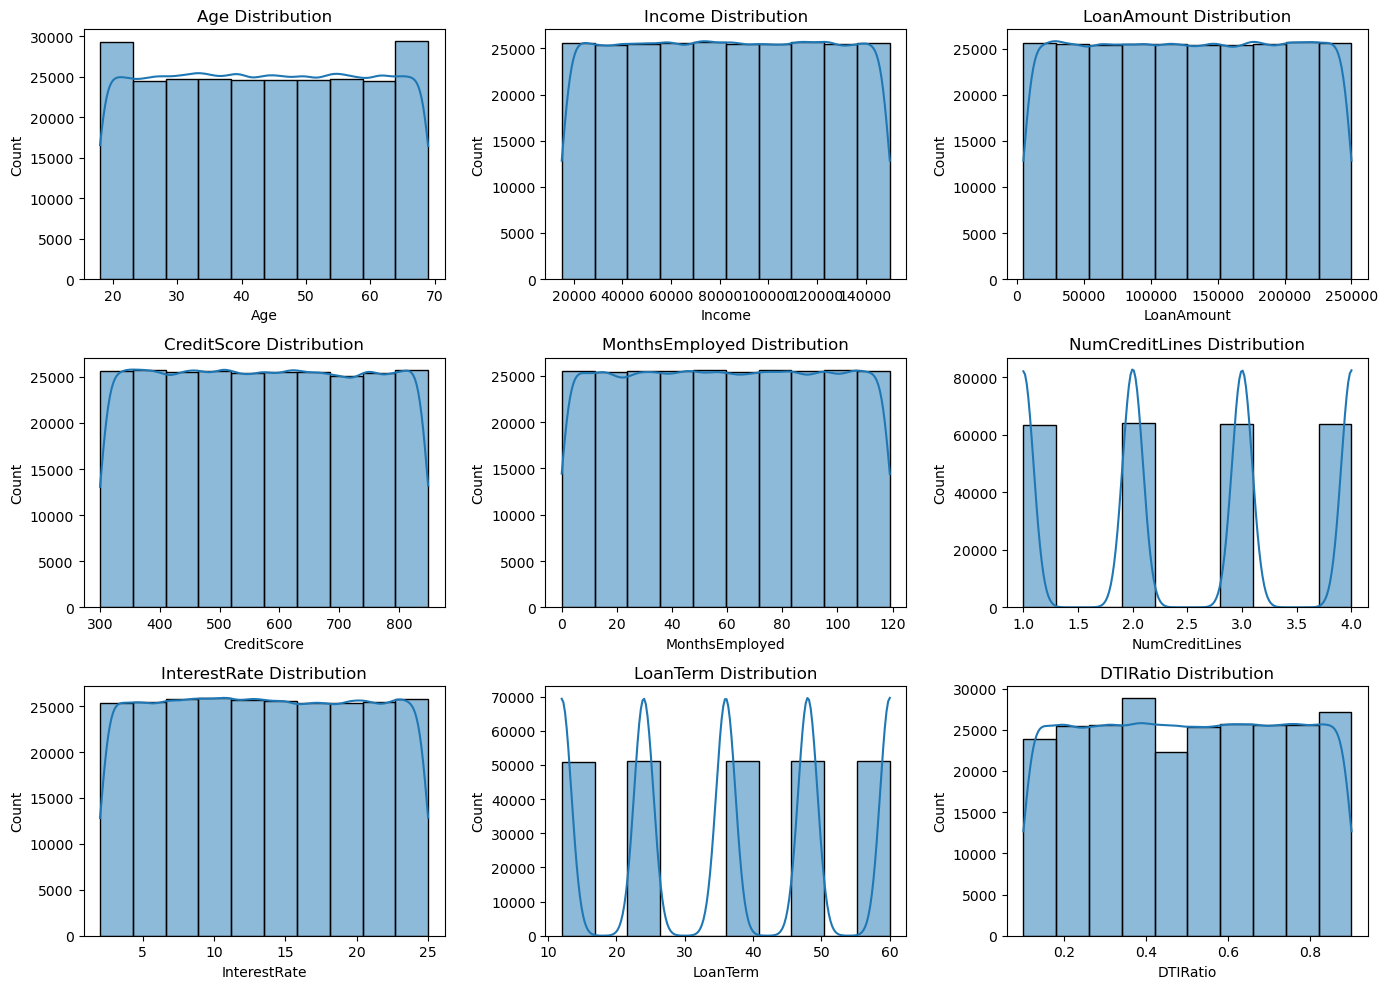

In [38]:
# Descriptive statistics
print("Descriptive statistics:")
print(df_reduced.describe())

# Histograms
plt.figure(figsize=(14, 10))
plt.subplot(3, 3, 1)
sns.histplot(df_reduced['Age'], bins=10, kde=True)
plt.title('Age Distribution')

plt.subplot(3, 3, 2)
sns.histplot(df_reduced['Income'], bins=10, kde=True)
plt.title('Income Distribution')

plt.subplot(3, 3, 3)
sns.histplot(df_reduced['LoanAmount'], bins=10, kde=True)
plt.title('LoanAmount Distribution')

plt.subplot(3, 3, 4)
sns.histplot(df_reduced['CreditScore'], bins=10, kde=True)
plt.title('CreditScore Distribution')

plt.subplot(3, 3, 5)
sns.histplot(df_reduced['MonthsEmployed'], bins=10, kde=True)
plt.title('MonthsEmployed Distribution')

plt.subplot(3, 3, 6)
sns.histplot(df_reduced['NumCreditLines'], bins=10, kde=True)
plt.title('NumCreditLines Distribution')

plt.subplot(3, 3, 7)
sns.histplot(df_reduced['InterestRate'], bins=10, kde=True)
plt.title('InterestRate Distribution')

plt.subplot(3, 3, 8)
sns.histplot(df_reduced['LoanTerm'], bins=10, kde=True)
plt.title('LoanTerm Distribution')

plt.subplot(3, 3, 9)
sns.histplot(df_reduced['DTIRatio'], bins=10, kde=True)
plt.title('DTIRatio Distribution')

plt.tight_layout()
plt.show()

In this image there are nine histograms where each of them shows the distribution of each of the variables containing loan data. The explored variables are Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, LoanTerm and DTIRatio. 

All distributions look reasonably normal and if any, Age distribution has a slightly right skew indicating more youthful customers. It can be noticed that the distribution of Income, LoanAmount, CreditScore, MonthsEmployed and InterestRate are more or less uniformly distributed across their respective bands. 

CreditLines too denote well-defined peaks at integer values which mean that it is a discrete variable the same as we concluded with NumCreditLines. 

The LoanTerm distribution is also easy to pick up since there are manifestations of discrete values by the look of peaks around particular values ( equating to the standard loan terms ranging from 12, 24, 36, 48, to 60 months). 

As it can be observed, the DTIRatio or Debt-to-Income Ratio is slightly skewed to the right, meaning that a majority of borrowers have lower ratios. 

These histograms give an indication of the distribution and nature of the loan applicants and the loans themselves in the given dataset and is in the form of frequency distribution of values.

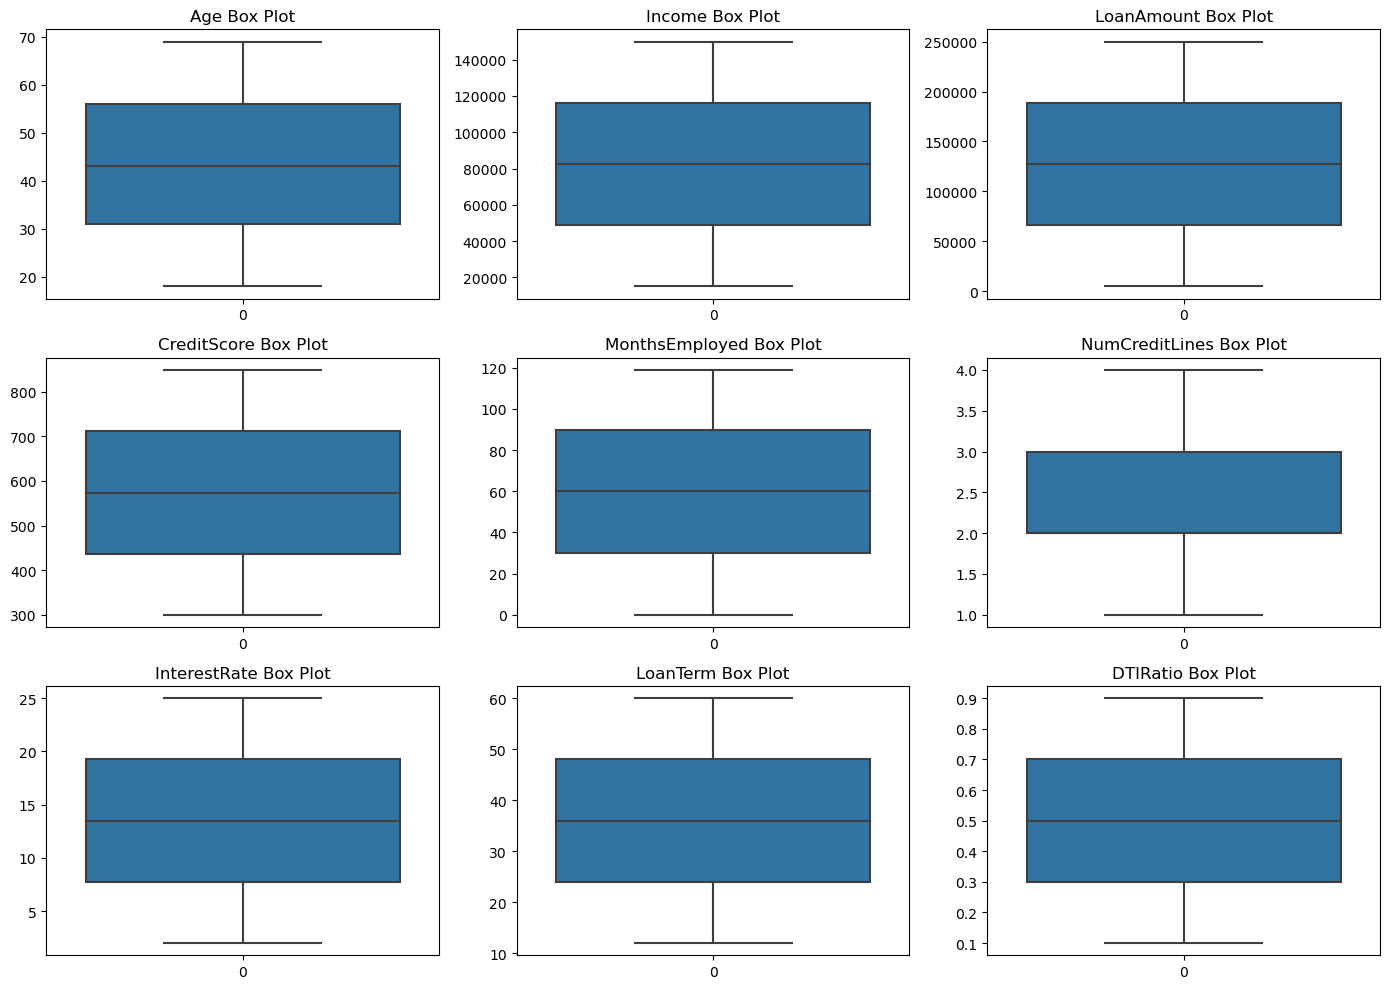

In [39]:
# Box plots
plt.figure(figsize=(14, 10))
plt.subplot(3, 3, 1)
sns.boxplot(df_reduced['Age'])
plt.title('Age Box Plot')

plt.subplot(3, 3, 2)
sns.boxplot(df_reduced['Income'])
plt.title('Income Box Plot')

plt.subplot(3, 3, 3)
sns.boxplot(df_reduced['LoanAmount'])
plt.title('LoanAmount Box Plot')

plt.subplot(3, 3, 4)
sns.boxplot(df_reduced['CreditScore'])
plt.title('CreditScore Box Plot')

plt.subplot(3, 3, 5)
sns.boxplot(df_reduced['MonthsEmployed'])
plt.title('MonthsEmployed Box Plot')

plt.subplot(3, 3, 6)
sns.boxplot(df_reduced['NumCreditLines'])
plt.title('NumCreditLines Box Plot')

plt.subplot(3, 3, 7)
sns.boxplot(df_reduced['InterestRate'])
plt.title('InterestRate Box Plot')

plt.subplot(3, 3, 8)
sns.boxplot(df_reduced['LoanTerm'])
plt.title('LoanTerm Box Plot')

plt.subplot(3, 3, 9)
sns.boxplot(df_reduced['DTIRatio'])
plt.title('DTIRatio Box Plot')

plt.tight_layout()
plt.show()

These plots give a graphical representation of the central point, variability, and relative amount of outliers for every variable. For example, Age has a nearly normal distribution and is approximately at 40-45, whereas Income has a very spread distribution which has a median, which is equal to 80000. Taking from the CreditScore plot most scores range could be between 450 to 700. In a way, these selected box plots provide the general understanding of the loan applicants and specifics of the loans in the given dataset.

## Coleration Analysis

In [40]:
# Compute the correlation matrix
correlation_matrix = df_reduced.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000 -0.001244   -0.002213    -0.000548       -0.000341   
Income         -0.001244  1.000000   -0.000865    -0.001430        0.002675   
LoanAmount     -0.002213 -0.000865    1.000000     0.001261        0.002817   
CreditScore    -0.000548 -0.001430    0.001261     1.000000        0.000613   
MonthsEmployed -0.000341  0.002675    0.002817     0.000613        1.000000   
NumCreditLines -0.000890 -0.002016    0.000794     0.000016        0.001267   
InterestRate   -0.001127 -0.002303   -0.002291     0.000436        0.000096   
LoanTerm        0.000263 -0.000998    0.002538     0.001130       -0.001166   
DTIRatio       -0.004689  0.000205    0.001122    -0.001039        0.001765   
Education      -0.000882 -0.000965    0.002551     0.000214       -0.001304   
EmploymentType  0.000787 -0.005146    0.003060     0.003503        0.000564   
MaritalStatus  -0.002187  0.0006

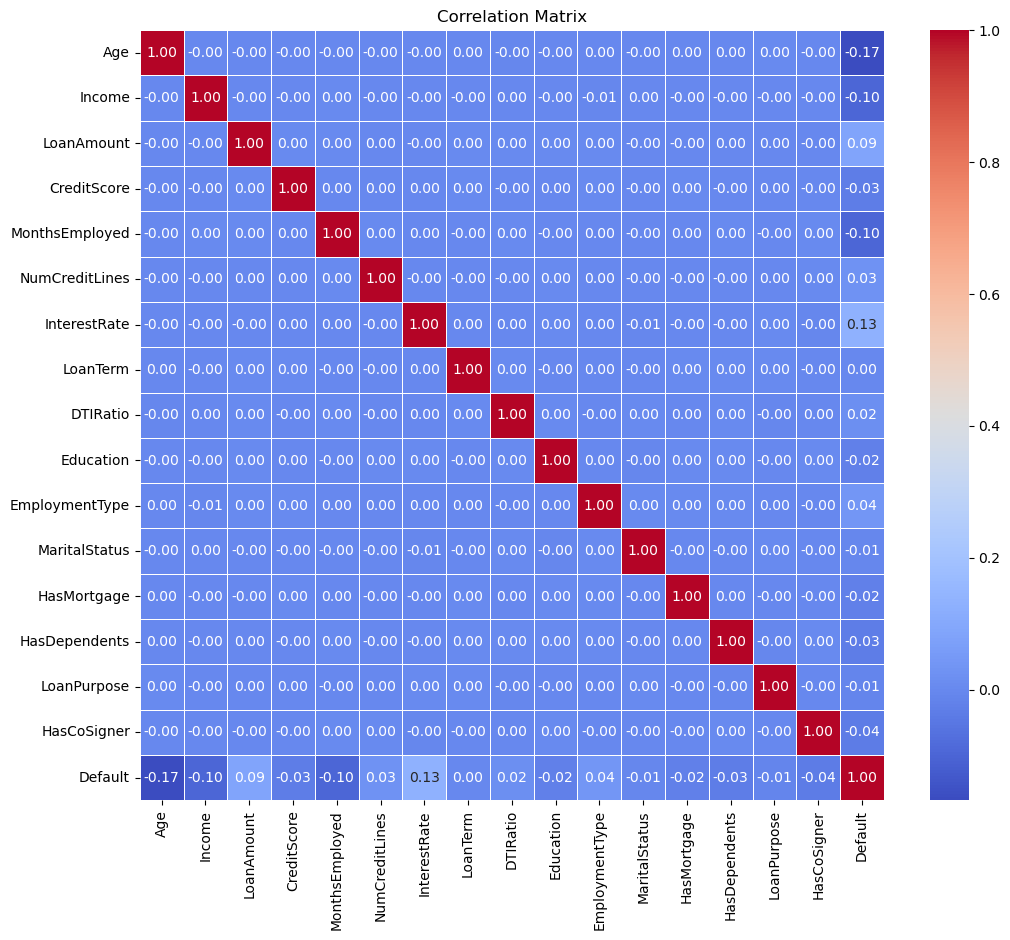

In [41]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<h2> Observations from Corelation  Analysis</h2>

<p>The correlation matrix issued above is used to show the actual or hypothesized links between various variables in a set of data. Every cell in the matrix itself contains the coefficient of the correlation between two variables which vary between -1 and 1. </p>

Correlations: Most correlations appear to be very weak (close to 0), as shown by the light blue and white cells.

Notable correlations:

Age has a weak negative correlation (-0.17) with Default
Income has a very weak negative correlation (-0.10) with Default
InterestRate has a very weak positive correlation (0.13) with Default
LoanAmount has a very weak positive correlation (0.09) with Default

Lack of strong correlations: 
There don't appear to be any strong correlations (above 0.5 or below -0.5) between variables, aside from each variable's correlation with itself.

This matrix suggests that in this dataset, most variables have very weak or negligible correlations with each other and with the Default variable. 
The strongest relationship is between Age and Default, but even this is relatively weak.

## Correlation with target variable 'Default'

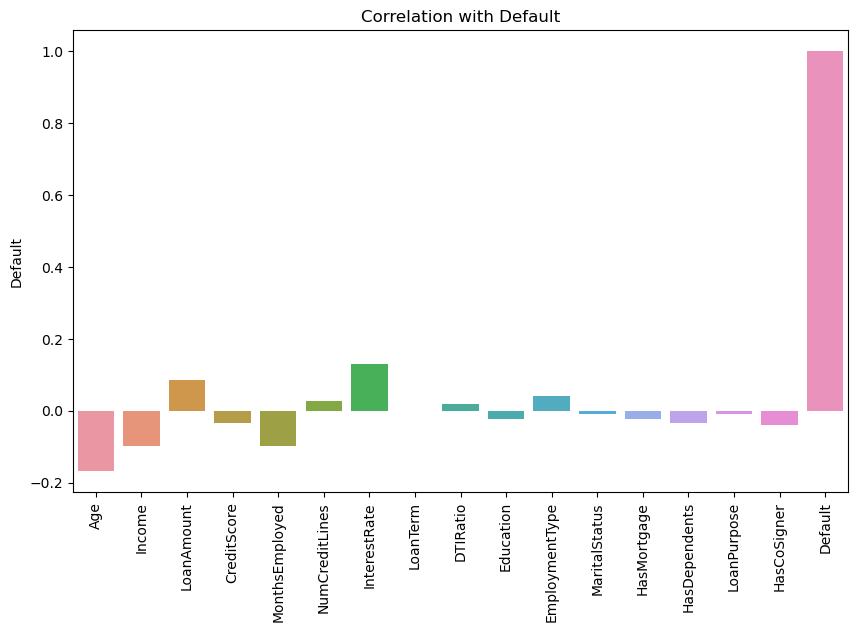

In [42]:
# Correlation with target variable 'Default'
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix['Default'].index, y=correlation_matrix['Default'])
plt.title('Correlation with Default')
plt.xticks(rotation=90)
plt.show()

<h2> Observations from Target Variable Default </h2>

<p>
The plot above  is a bar plot that visualizes the correlation between different variables and the target variable "Default".<br> 
The x-axis shows the different variables, while the y-axis represents the correlation coefficient.</p>

<h3>observations based on the plot:<h3>
<p> Most variables show very weak correlations, with bars close to zero. The "Default" variable itself has a perfect correlation of 1.0, as expected when correlating a variable with itself.<br>
Overall, this chart reveals that while there are some relationships between these factors and loan default, most correlations are relatively weak. No single factor stands out as having a particularly strong influence on default probability. 
This suggests that predicting loan defaults may require considering multiple factors in combination, rather than relying heavily on any individual characteristic.</p>

## Export Preprocessed Dataset

In [43]:
df_reduced.to_csv('preprocessed_loan_data.csv', index=False, header=True)